## IRIS DATASET

## Lectura de datos

Antes de nada, hay que importar los paquetes y librerías que se van a necesitar durante el proceso.

In [1]:
## Autor: Mario Pérez Esteso <mario@geekytheory.com>
%pylab inline
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn import preprocessing
import numpy as np

Populating the interactive namespace from numpy and matplotlib


A continuación, se asignan los nombres de las columnas al dataset.

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

Haciendo uso de la función **read_csv** se importa el archivo de datos de Iris Flower.

In [3]:
iris = pd.read_csv('data/iris.data', names = columns)

### Inspección de datos

In [4]:
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Antes de nada, es conveniente realizar una pequeña **inspección de los datos**. 

En este caso, se ha definido una función que grafica cada característica del dataset en función de las demás de forma automática.

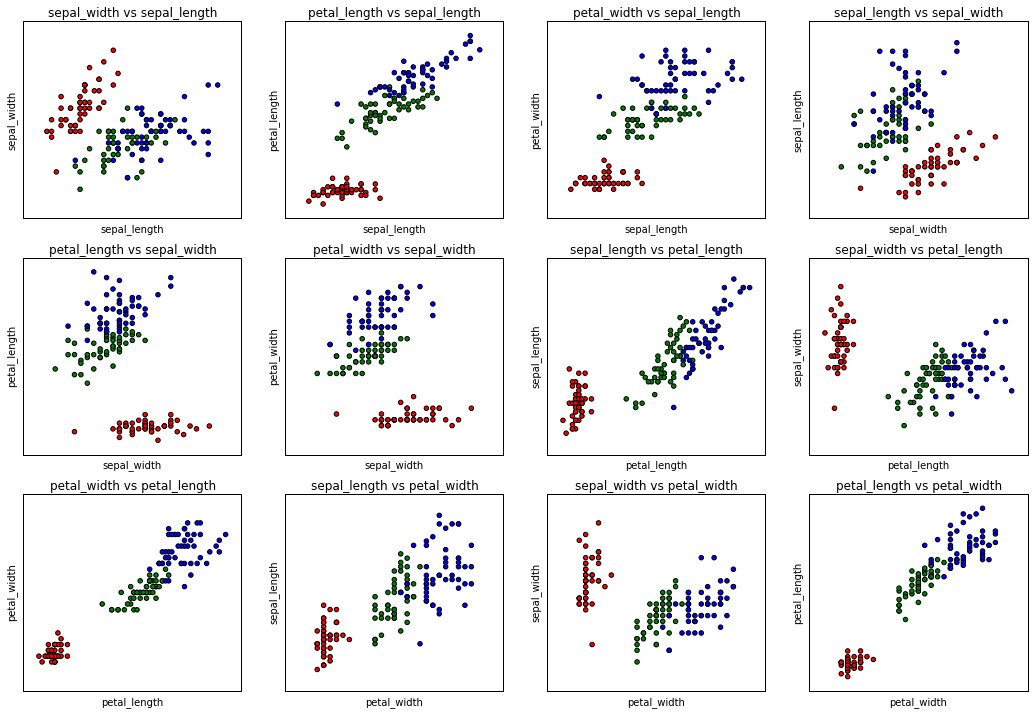

In [5]:
def plotDataset():
    labels = iris['class']
    labelencoder = preprocessing.LabelEncoder()
    labelencoder.fit(labels)
    plot_index = 1
    labels = labelencoder.transform(labels)
    colormap = np.array(['r', 'g', 'b'])
    plt.figure(figsize=(18,12))
    plt.clf()
    for i in range(0,4):
        for j in range(0,4):
            if i != j:  
                x = iris[columns[i]]
                y = iris[columns[j]]
                x_min, x_max = x.min() - .5, x.max() + .5
                y_min, y_max = y.min() - .5, y.max() + .5
                # Plot the training points
                plt.subplot(3, 4, plot_index)
                plt.scatter(x, y, c=colormap[labels], cmap=plt.cm.Paired)
                plt.xlabel(columns[i])
                plt.ylabel(columns[j])
                plt.title(columns[j]+" vs "+columns[i])
                plt.xlim(x_min, x_max)
                plt.ylim(y_min, y_max)
                plt.xticks(())
                plt.yticks(())
                plot_index = plot_index + 1
                
    plt.show()
    
plotDataset()


## Tratamiento de datos

Una vez realizada la gráfica de los datos, conviene **separar los datos en datos de entrenamiento y test**. 

Para ello, se define la función **splitTrainTest**, que recibe un *dataframe* y el porcentaje de datos que serán de entrenamiento y test.

In [6]:
def splitTrainTest(dataframe, percentage=0.6):
    msk = np.random.rand(len(dataframe)) < percentage
    train = dataframe[msk]
    test = dataframe[~msk]
    return train, test

iris_train, iris_test = splitTrainTest(iris)

Tras esto, se separan las 4 primeras columnas (datos numéricos) y la última (labels).

In [7]:
iris_data_train = iris_train.ix[:,0:-1]
iris_data_test = iris_test.ix[:,0:-1]
iris_target_train = iris_train['class']
iris_target_test = iris_test['class']
iris_data_train.shape

(78, 4)

Scikit-Learn no acepta strings como parámetros de funciones, por lo que hay que pasar los *labels* a formato numérico automáticamente.

+ Iris-setosa     -> 0
+ Iris-versicolor -> 1
+ Iris-virginica  -> 2

In [8]:
le_train = preprocessing.LabelEncoder()
le_train.fit(iris_target_train)
iris_target_train_encoded = le_train.transform(iris_target_train)
le_test = preprocessing.LabelEncoder()
le_test.fit(iris_target_test)
iris_target_test_encoded = le_test.transform(iris_target_test)

In [9]:
testClasses = le_test.classes_
testClasses

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Creación de un modelo

Haciendo uso de la función **KNeighborsClassifier()** creamos el modelo. En este caso, los parámetros irán por defecto. Los parámetros se pueden ver en la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de la implementación del algoritmo.

In [10]:
classifier = neighbors.KNeighborsClassifier()

In [11]:
classifier.fit(iris_data_train, iris_target_train_encoded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

## Predicción

In [12]:
prediction = classifier.predict(iris_data_test)

In [13]:
accuracy = classifier.score(iris_data_test, iris_target_test_encoded)

In [14]:
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 0.972222222222


In [15]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

## Matriz de confusión

| 23 | 0  | 0  |
|----|----|----|
| 0  | 14 | 2  |
| 0  | 0  | 23 |

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(iris_target_test_encoded, prediction)

In [17]:
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26  0  0]
 [ 0 23  1]
 [ 0  1 21]]
Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          0.95833333  0.04166667]
 [ 0.          0.04545455  0.95454545]]


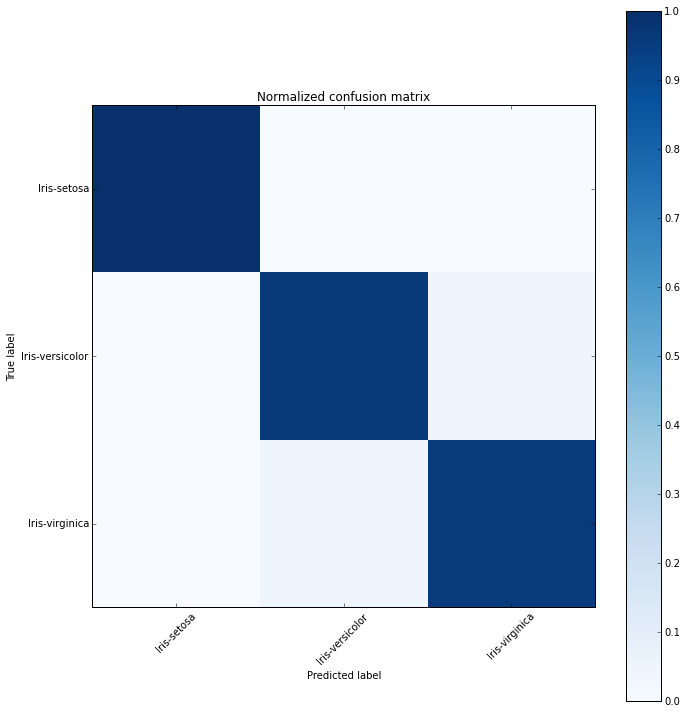

In [20]:
print('Confusion matrix, without normalization')
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_normalized, testClasses, title='Normalized confusion matrix')

plt.show()

## ¿Qué algoritmo funciona mejor?

Algorithm: auto
Predicted model accuracy: 0.972222222222
Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          0.95833333  0.04166667]
 [ 0.          0.04545455  0.95454545]]


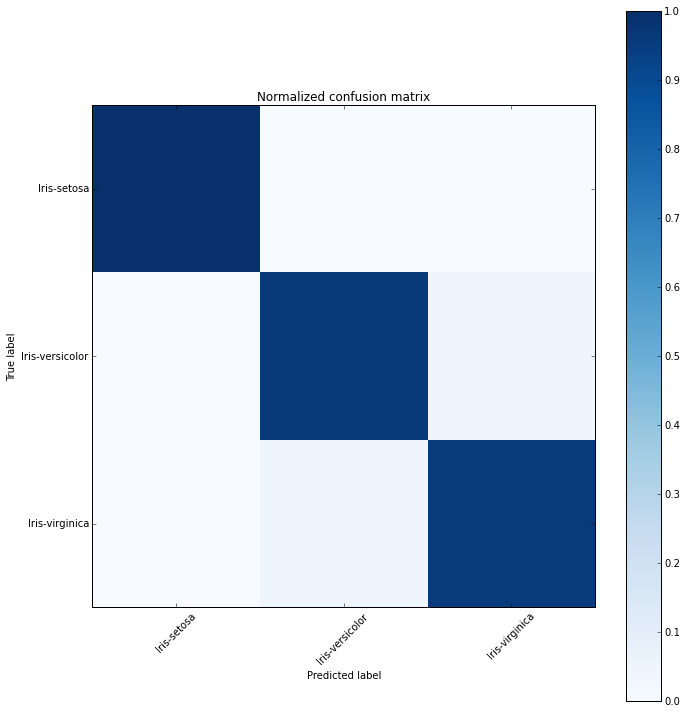

Algorithm: ball_tree
Predicted model accuracy: 0.972222222222
Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          0.95833333  0.04166667]
 [ 0.          0.04545455  0.95454545]]


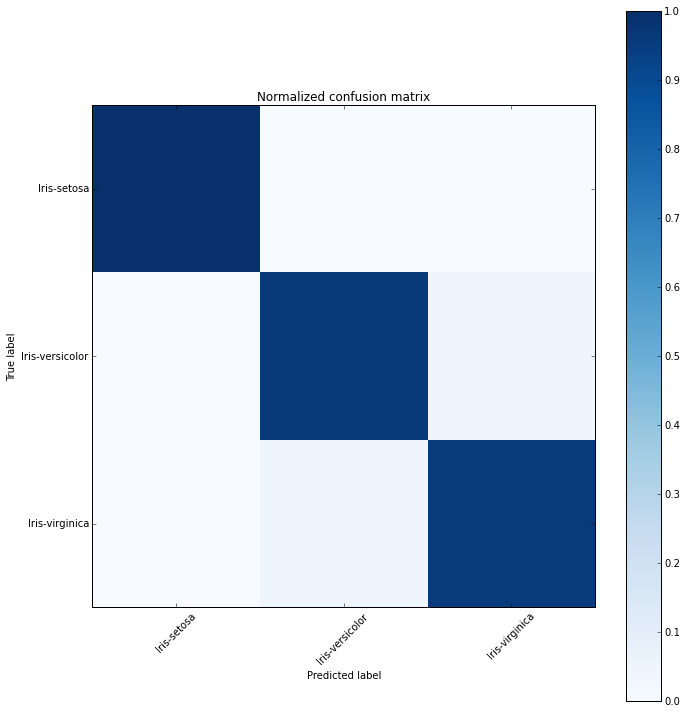

Algorithm: kd_tree
Predicted model accuracy: 0.972222222222
Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          0.95833333  0.04166667]
 [ 0.          0.04545455  0.95454545]]


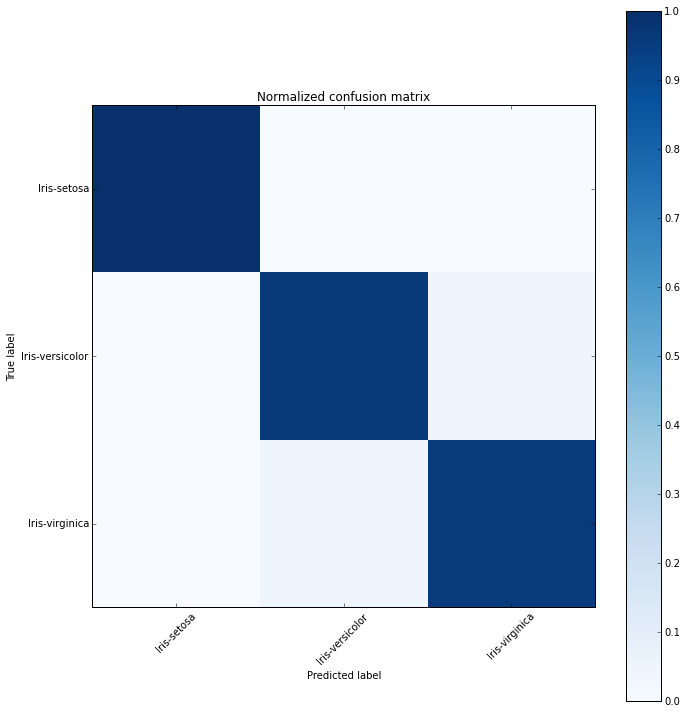

Algorithm: brute
Predicted model accuracy: 0.972222222222
Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          0.95833333  0.04166667]
 [ 0.          0.04545455  0.95454545]]


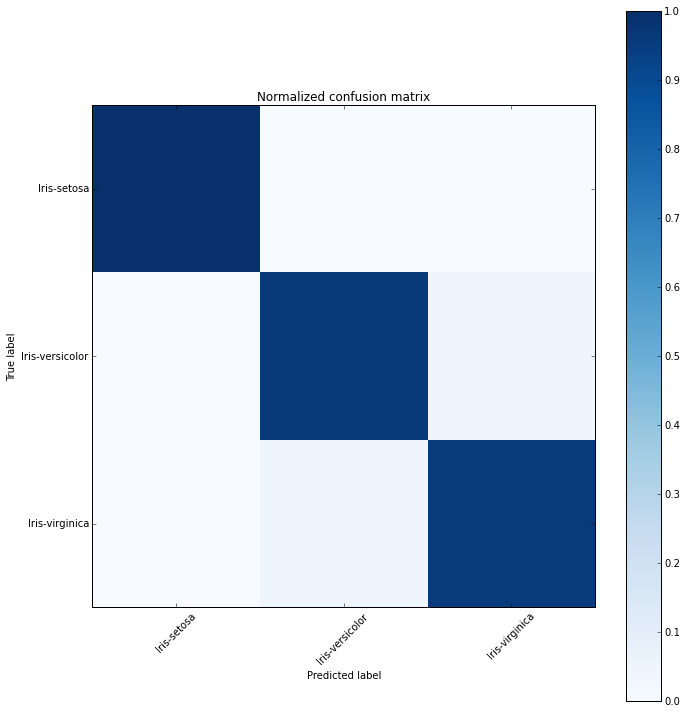

In [21]:
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']

for alg in algorithms:
    classifier = neighbors.KNeighborsClassifier(algorithm = alg)
    classifier.fit(iris_data_train, iris_target_train_encoded)
    prediction = classifier.predict(iris_data_test)
    accuracy = classifier.score(iris_data_test, iris_target_test_encoded)
    print ("Algorithm: " + alg)
    print ("Predicted model accuracy: " + str(accuracy))
    cm = confusion_matrix(iris_target_test_encoded, prediction)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(cm_normalized, testClasses, title='Normalized confusion matrix')
    plt.show()